Import dependencies

In [1]:
%matplotlib inline

## data handling
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pytry
import pickle

## path
from pathlib import Path
import sys
sys.path.insert(0, './network')

## warnings
import warnings
warnings.filterwarnings('ignore')

## modify np.load to work with pytry
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

Softmax function

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

# Comparison Plots

Set path to data

In [3]:
data_folder = Path('data/')

Load TD(n) discrete time data

In [4]:
baseline_data = pd.DataFrame(pytry.read(data_folder/'MG_TDn'))
baseline_ep_rewards = baseline_data['episodes'][0]
baseline_rewards = baseline_data['rewards'][0]
baseline_values = baseline_data['values'][0]
baseline_policy = baseline_data['policy'][0]

Load TD(theta) continuous time data

In [5]:
tdtheta_data = pd.DataFrame(pytry.read(data_folder/'MG_TDtheta'))
tdtheta_ep_rewards = tdtheta_data['episodes'][0]/3
tdtheta_rewards = tdtheta_data['rewards'][0]
tdtheta_values = tdtheta_data['values'][0]
tdtheta_policy = tdtheta_data['policy'][0]

Plot rewards recieved in each learning trial, across all learning trials

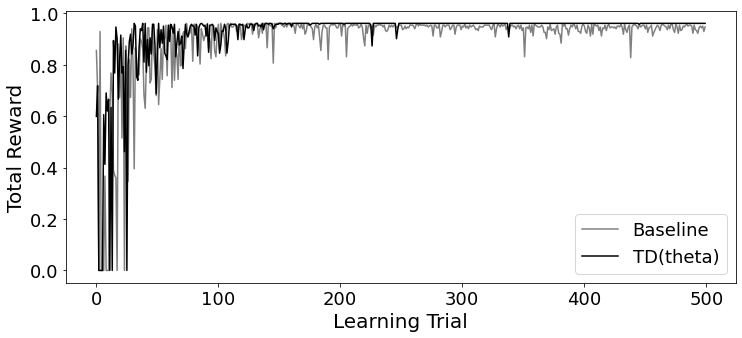

In [6]:
fig = plt.figure(figsize=(12, 5))
plt.plot(baseline_ep_rewards, color = 'grey', label = 'Baseline')
plt.plot(tdtheta_ep_rewards, color = 'black', label = 'TD(theta)')
plt.xlabel('Learning Trial', fontsize = 20)
plt.ylabel('Total Reward', fontsize = 20)
plt.legend(fontsize = 18)
plt.tick_params(labelsize=18)

## save figure
fig.savefig("./figures/rewards_time.pdf", bbox_inches="tight")

Plot ideal value vs. actual value of the final learning trial

In [7]:
## Function for getting the idea value
lst_rew=-1

def value(discount, rewards, t):
    d = discount**t
    return np.convolve(d[::-1], rewards[lst_rew])[-len(t):]

## Get range of values = length of last learning trial
bl_T = len(baseline_rewards[lst_rew])
bl_t = np.arange(0, int(bl_T))

ldn_T = len(tdtheta_rewards[lst_rew])
ldn_t = np.arange(0, int(ldn_T))

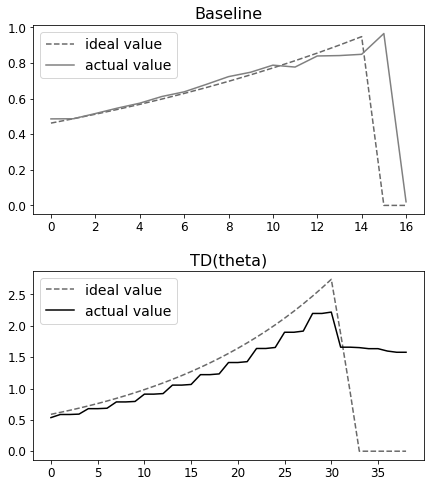

In [8]:
## Plot ideal vs. actual values
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,8))

ax1.plot(bl_t, value(0.95, baseline_rewards, bl_t), label='ideal value', ls='--', color = 'dimgrey')
ax1.plot(baseline_values[lst_rew], label='actual value', color = 'grey')
ax1.legend(fontsize=14)
ax1.set_title('Baseline', fontsize = 16)
ax1.tick_params(labelsize = 12)

ax2.plot(ldn_t, value(0.95, tdtheta_rewards, ldn_t), label='ideal value', ls='--', color = 'dimgrey')
ax2.plot(tdtheta_values[lst_rew], label='actual value', color = 'black')
ax2.legend(fontsize=14)
ax2.set_title('TD(theta)', fontsize = 16)
ax2.tick_params(labelsize = 12)

plt.subplots_adjust(hspace=0.3)

## save figure
fig.savefig("./figures/value_plots.pdf", bbox_inches="tight")

Plot state values

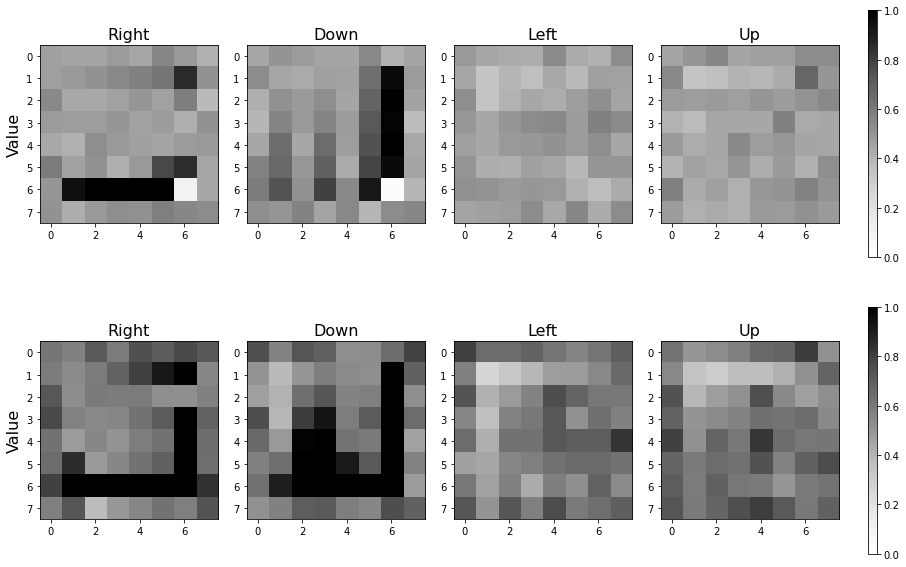

In [9]:
fig, ((ax1, ax2, ax3, ax4, cax1),(ax5, ax6, ax7, ax8, cax2)) = plt.subplots(nrows = 2, ncols=5,figsize=(15,10), 
                  gridspec_kw={"width_ratios":[1,1,1,1, 0.05]})


first = ax1.imshow(baseline_policy[:,:,0,0], vmin=0, vmax=1, cmap='Greys')
ax1.set_title('Right', fontsize = 16)
ax1.set_ylabel('Value', fontsize = 16)

ax2.imshow(baseline_policy[:,:,1,0], vmin=0, vmax=1, cmap='Greys')
ax2.set_title('Down', fontsize = 16)

ax3.imshow(baseline_policy[:,:,2,0], vmin=0, vmax=1, cmap='Greys')
ax3.set_title('Left', fontsize = 16)

ax4.imshow(baseline_policy[:,:,3,0], vmin=0, vmax=1, cmap='Greys')
ax4.set_title('Up', fontsize = 16)

second = ax5.imshow(tdtheta_policy[:,:,0,0], vmin=0, vmax=1, cmap='Greys')
ax5.set_title('Right', fontsize = 16)
ax5.set_ylabel('Value', fontsize = 16)

ax6.imshow(tdtheta_policy[:,:,1,0], vmin=0, vmax=1, cmap='Greys')
ax6.set_title('Down', fontsize = 16)

ax7.imshow(tdtheta_policy[:,:,2,0], vmin=0, vmax=1, cmap='Greys')
ax7.set_title('Left', fontsize = 16)

ax8.imshow(tdtheta_policy[:,:,3,0], vmin=0, vmax=1, cmap='Greys')
ax8.set_title('Up', fontsize = 16)

fig.colorbar(first, cax=cax1)
fig.colorbar(second, cax=cax2)
plt.show()

## save figure
fig.savefig("./figures/value_plots.pdf", bbox_inches="tight")